In [16]:
m1 = open("mem1.bin", "rb").read()
y = 0x6b46


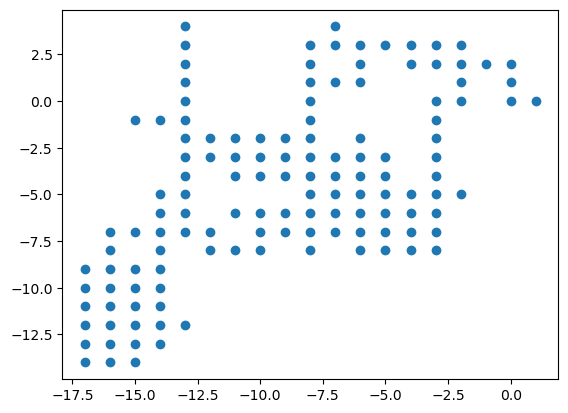

In [23]:
y = 0x6b46
cells = { y:(0,0) }
dirs = [ (1,0), (0,1), (-1,0), (0,-1) ]
stack = [y]
while stack:
    y = stack.pop()
    for i in range(4):
        y1 = m1[y + i*2]+m1[y + i*2 + 1]*256
        if y1 != 0:
            if y1 not in cells:
                cells[y1] = (cells[y][0] + dirs[i][0], cells[y][1] + dirs[i][1])
                stack.append(y1)

from matplotlib import pyplot as plt
v = list(cells.values())
plt.scatter([b[0] for b in v], [b[1] for b in v])


In [33]:
cellwidth = 10
cellheight = 10

boxlist = [ ]
for k, v in cells.items():
    k += 8
    while m1[k] != 0:
        if m1[k+6] != 0xf7:
            zhi = m1[k]/256.0*cellheight
            zlo = m1[k+1]/256.0*cellheight
            xlo = (m1[k+2]/256.0 + v[0])*cellwidth
            xhi = xlo + m1[k+3]/256.0*cellwidth
            ylo = (m1[k+4]/256.0 + v[1])*cellwidth
            yhi = ylo + m1[k+5]/256.0*cellwidth
            boxlist.append((((xlo+xhi)/2, (ylo+yhi)/2, (zlo+zhi)/2), (xhi-xlo, yhi-ylo, zhi-zlo)))
        k += 7
    
    
print("var boxcentres = [ %s ]" % ", ".join("Vector3(%.2f,%.2f,%.2f)" % bb[0]  for bb in boxlist))
print()
print("var boxsizes = [ %s ]" % ", ".join("Vector3(%.2f,%.2f,%.2f)" % bb[1]  for bb in boxlist))


var boxcentres = [ Vector3(5.00,0.62,2.50), Vector3(5.00,1.88,2.52), Vector3(5.00,3.12,2.50), Vector3(5.00,4.38,2.44), Vector3(5.00,5.62,2.32), Vector3(5.00,6.88,2.17), Vector3(7.81,6.25,2.19), Vector3(15.00,5.00,0.94), Vector3(5.62,12.50,1.56), Vector3(5.00,15.62,1.80), Vector3(5.00,16.88,2.01), Vector3(5.00,18.12,2.21), Vector3(5.00,19.38,2.36), Vector3(1.88,25.00,1.88), Vector3(2.81,27.19,2.50), Vector3(5.00,29.06,1.89), Vector3(5.00,27.19,2.42), Vector3(-1.88,25.00,1.25), Vector3(-12.81,25.47,1.56), Vector3(-9.82,27.81,1.56), Vector3(-19.65,29.14,4.69), Vector3(-11.56,40.16,1.56), Vector3(-11.56,35.96,2.68), Vector3(-12.73,31.11,1.56), Vector3(-16.56,31.13,0.94), Vector3(-25.00,21.56,2.81), Vector3(-22.50,23.44,4.69), Vector3(-20.27,26.17,4.69), Vector3(-10.84,18.12,4.69), Vector3(-15.18,16.33,2.81), Vector3(-19.34,13.67,4.69), Vector3(-11.56,12.32,1.56), Vector3(-11.88,8.12,4.69), Vector3(-13.07,6.93,1.88), Vector3(-10.84,3.44,4.69), Vector3(-27.19,7.81,0.94), Vector3(-24.69,3.44,